## Задание
Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.
Подберите параметры модели SARIMAX для этого ряда.
Сделайте вывод о том, как изменилась модель по сравнению с недельной.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
import os
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import warnings
from statsmodels.tsa.arima_model import ARIMA
from random import random
# Определим p, d и q 
q = 2
p = 1
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с месячными данными, тогда сезонность это 6 мес.
qs = 1
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs ,12] 

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_m = data.resample('M').mean()

In [4]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [1, 2, 2]    : ps,ds,qs, S= [0, 0, 1, 12]


In [5]:
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[1, 2, 2]x[0, 0, 1, 12] - AIC:3204.0544610598063


In [6]:
print(results.summary().tables[0],results.summary().tables[1])

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  188
Model:             SARIMAX(1, 2, 2)x(0, 0, [1], 12)   Log Likelihood               -1597.027
Date:                              Thu, 21 May 2020   AIC                           3204.054
Time:                                      10:54:33   BIC                           3219.763
Sample:                                           0   HQIC                          3210.428
                                              - 188                                         
Covariance Type:                                opg                                         
============================================================================================ ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----

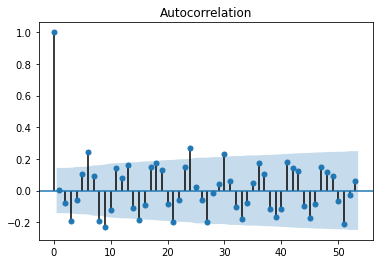

In [7]:
sm.graphics.tsa.plot_acf(results.resid, lags=53)
plt.show()

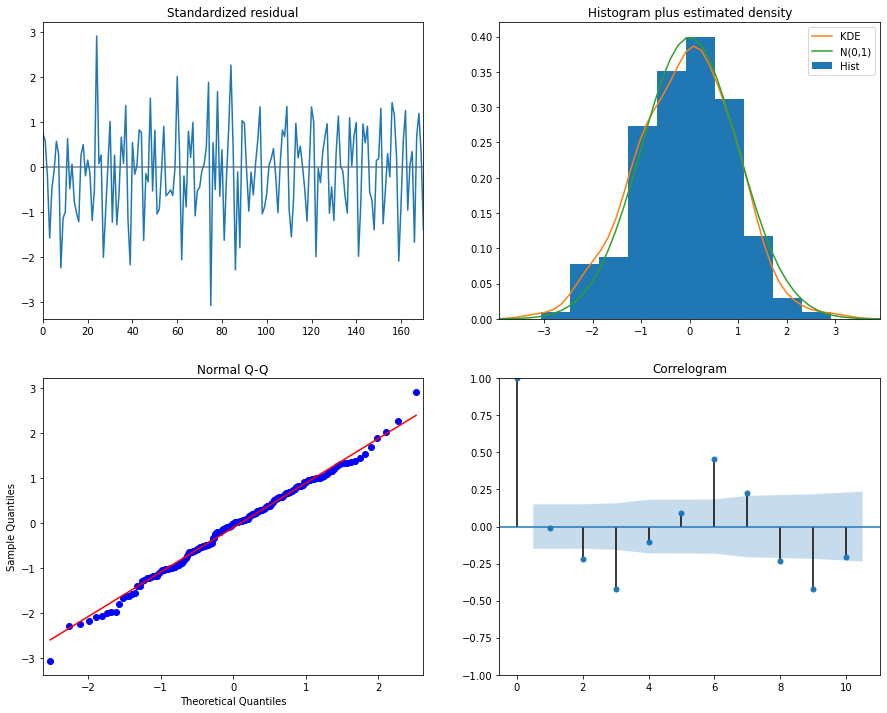

In [8]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [15]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [16]:
data_m['PJME_MW'].values.shape

(200,)

In [26]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[150:-30],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:449.70819439890545
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:134.49957509670838
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:6.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:133.1525131687777
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:415.2411036607275
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:141.2732119479693
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:8.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:115.10141340990263
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:391.82653754236173
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:120.7364667277098
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:10.0
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:nan
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:8.0
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:10.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)3 - AIC:345.77679250435204
ARIMA(0, 1, 0)x(0, 0, 1, 12)3 - AIC:111.58954342715253
ARIMA(0, 1, 0)x(0, 0, 2, 12)3 - AIC:6.0
ARIMA(0, 1, 

Лучшие результаты на месячных данных параметры модели SARIMA(0,0, 0)x(0, 1, 1, 12) - AIC:2.0 (для p,q,d,ps,ds,qs из диапазона [0,1,2]).

In [27]:
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения
N1 =300   # берем дданные не от начала - так быстрее работает
N2=12  # число точек для теста
nforecast = N2+30

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[N1:-N2],order=[0,0,0],
                                seasonal_order=[0,1,1,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 4.0


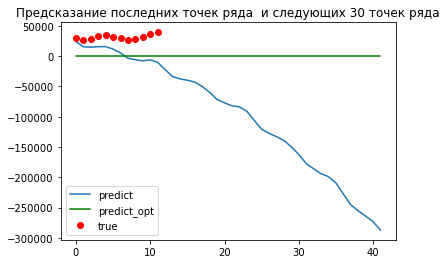

In [28]:
nforecast = N2+30  # полное число предиктов (тест+ чистый предикт)

pred_dynamic = results.forecast(nforecast)    #делаем предсказание на 30 точtк от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(nforecast)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

### ЧТО ТО какой то странный график получился :(((  наверное это просто мало данных месячных

In [29]:
results_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ma.S.L12,0,-0,nan,nan,0,0
sigma2,1.0000,-0,-inf,0.000,1.000,1.000


### 4 )  Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
###  5) Оцените результат моделирования
###  6)Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

In [31]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [32]:
brent_data_w = brent_data.resample('W').mean()
brent_data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


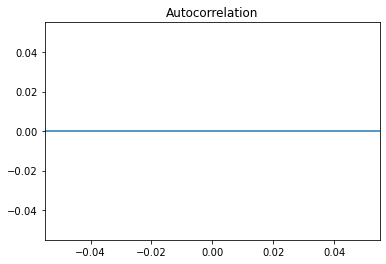

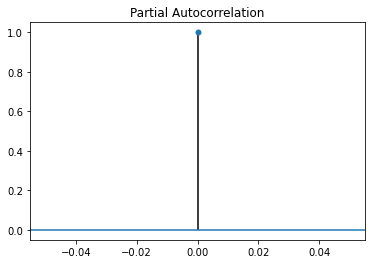

In [33]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values, lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values, lags=30)
plt.show()

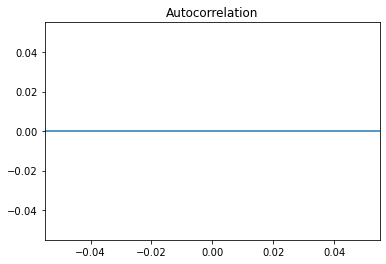

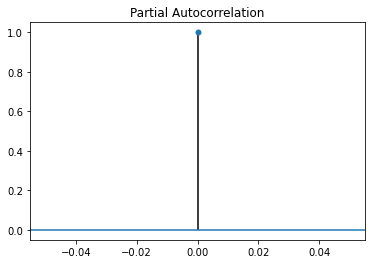

In [34]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
brent_dif = brent_data_w['Значение'].diff(1)

sm.graphics.tsa.plot_acf(brent_dif[1:], lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_dif[1:], lags=30)
plt.show()

ACF - быстро падает для недельных графиков, для первых разностей ACF - быстро падает (не более 1-й корреляции) 
PACF - быстро пададает, для первых разностей РACF - быстро падает (не более 1-й корреляции) 
q , p - берем р=1(2) (PACF) , q =1(2) (скорее всего не очень большой после производной)
ADF - 1 раз интегрируемый - d = 1 
Запустим модель без сезонного анализа (ARIMA)

In [35]:
# Определим p, d и q 
q = 1
p = 2
d = 1
pdq = [p, d, q]

N2=30
warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(brent_data_w['Значение'].values[:-N2],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 1] - AIC:1908.2969943226415
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  440
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -948.148
Date:                Thu, 21 May 2020   AIC                           1908.297
Time:                        11:32:56   BIC                           1932.777
Sample:                             0   HQIC                          1917.957
                                - 440                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

Все коэффициетты не маленькие, что свидетельствует о том, что они играют рол при определении ответа модели. посмотрим на визуализацию результатов работы модели, где видно, что остатки ряда распределены не одинаково на краях модели и в ее основной части, что не позволит принимать правильное решение (рис.Normal Q-Q, Standardized rezidual)

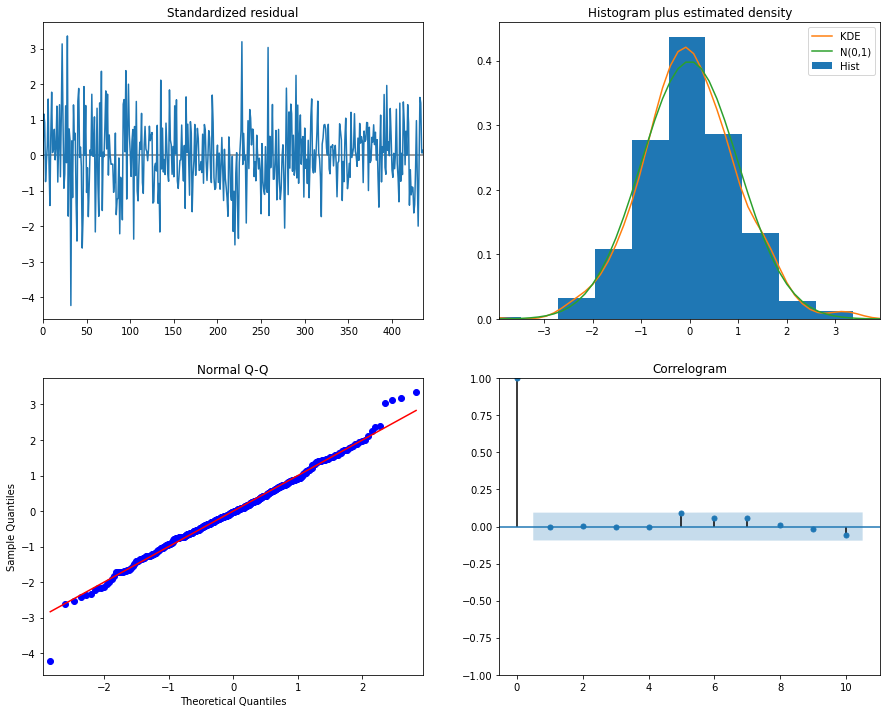

In [36]:
resultsb.plot_diagnostics(figsize=(15, 12))
plt.show()

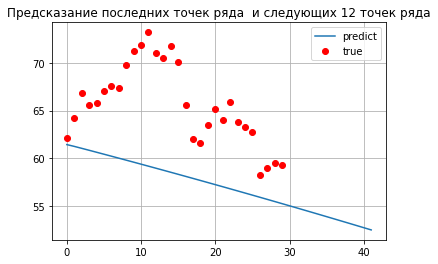

In [38]:
pred_dynamic = resultsb.forecast(42)    #делаем предсказание на 3 точки от текущего конца ряда

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(brent_data_w['Значение'].values[-30:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()
plt.grid()
plt.plot()
plt.show()

In [39]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(brent_data_w['Значение'].values[:-100]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:-34.36597445308757
ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:-492.46683683733403
ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:-810.3361303633171
ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:-585.602322326466
ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:-1137.4686453108784
ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:-1094.0831390266185
ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:-1179.7019998988453
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:-1455.0581244605282
ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:-1490.5494066479464
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:-1483.686956183913
ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:-1478.7219259057056
ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:-1472.5938864182344
ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:-1465.5506408548222
ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:-1463.4312678691954
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:-1463.2949926492454
ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-1498.9597246518042
ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:-1492.0231228762095
ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-1486.5054018314072
ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC

Поиск по сетке определяет модель ARIMA(1, 0, 1)- AIC:-1498

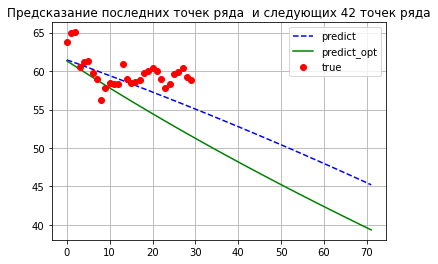

In [40]:

N2=30
nforecast = N2+42

modb_opt = sm.tsa.statespace.SARIMAX(brent_data_w['Значение'].values[:-N2],
                               order=[1,0,1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic = resultsb.forecast(nforecast)    #делаем предсказание c 30 точки от текущего конца ряда
pred_dynamic_opt = resultsb_opt.forecast(72) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 42 точек ряда')
plt.legend()
plt.grid()
plt.show()

In [41]:
resultsb_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,1.5283,0.970,1.575,0.115,-0.373,3.430
drift,-0.0026,0.002,-1.478,0.139,-0.006,0.001
ar.L1,0.9876,0.008,123.458,0.000,0.972,1.003
ma.L1,0.3629,0.046,7.917,0.000,0.273,0.453
sigma2,4.5571,0.266,17.142,0.000,4.036,5.078
